# Weather Data Analysis Project

# Import necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (make sure to use the correct file path)

In [3]:
# Load the dataset (make sure to use the correct file path)
data = pd.read_csv('C:\\Users\\Administrator\\Documents\\Weather Dataa.csv')

# Display the first few rows of the dataset

In [4]:

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
       Date/Time  Temperature  Dew Point Temperature  Rel Hum_%  \
0  1/1/2012 0:00         -1.8                   -3.9         86   
1  1/1/2012 1:00         -1.8                   -3.7         87   
2  1/1/2012 2:00         -1.8                   -3.4         89   
3  1/1/2012 3:00         -1.5                   -3.2         88   
4  1/1/2012 4:00         -1.5                   -3.3         88   

   Wind Speed_km/h  Visibility_km  Press_kPa               Weather  
0                4            8.0     101.24                   Fog  
1                4            8.0     101.24                   Fog  
2                7            4.0     101.26  Freezing Drizzle,Fog  
3                6            4.0     101.27  Freezing Drizzle,Fog  
4                7            4.8     101.23                   Fog  


# Data Cleaning: Handle missing values

In [5]:

# Data Cleaning: Handle missing values
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())  # Fill missing temperature with mean
data['Dew Point Temperature'] = data['Dew Point Temperature'].fillna(data['Dew Point Temperature'].mean())  # Fill missing dew point temperature with mean
data['Rel Hum_%'] = data['Rel Hum_%'].fillna(data['Rel Hum_%'].mean())  # Fill missing humidity with mean
data['Wind Speed_km/h'] = data['Wind Speed_km/h'].fillna(data['Wind Speed_km/h'].mean())  # Fill missing wind speed with mean
data['Visibility_km'] = data['Visibility_km'].fillna(data['Visibility_km'].mean())  # Fill missing visibility with mean
data['Press_kPa'] = data['Press_kPa'].fillna(data['Press_kPa'].mean())  # Fill missing pressure with mean


# Convert 'Date/Time' to datetime format

In [6]:
# Convert 'Date/Time' to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Check cleaned data info

In [7]:

# Check cleaned data info
print("\nCleaned data info:")
print(data.info())


Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date/Time              8784 non-null   datetime64[ns]
 1   Temperature            8784 non-null   float64       
 2   Dew Point Temperature  8784 non-null   float64       
 3   Rel Hum_%              8784 non-null   int64         
 4   Wind Speed_km/h        8784 non-null   int64         
 5   Visibility_km          8784 non-null   float64       
 6   Press_kPa              8784 non-null   float64       
 7   Weather                8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB
None


# EDA: Summary statistics

In [8]:

# EDA: Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 Date/Time  Temperature  Dew Point Temperature    Rel Hum_%  \
count                 8784  8784.000000            8784.000000  8784.000000   
mean   2012-07-01 23:30:00     8.798144               2.555294    67.431694   
min    2012-01-01 00:00:00   -23.300000             -28.500000    18.000000   
25%    2012-04-01 11:45:00     0.100000              -5.900000    56.000000   
50%    2012-07-01 23:30:00     9.300000               3.300000    68.000000   
75%    2012-10-01 11:15:00    18.800000              11.800000    81.000000   
max    2012-12-31 23:00:00    33.000000              24.400000   100.000000   
std                    NaN    11.687883              10.883072    16.918881   

       Wind Speed_km/h  Visibility_km    Press_kPa  
count      8784.000000    8784.000000  8784.000000  
mean         14.945469      27.664447   101.051623  
min           0.000000       0.200000    97.520000  
25%           9.000000      24.100000   100.560000  
50

# EDA: Visualizing Temperature distribution

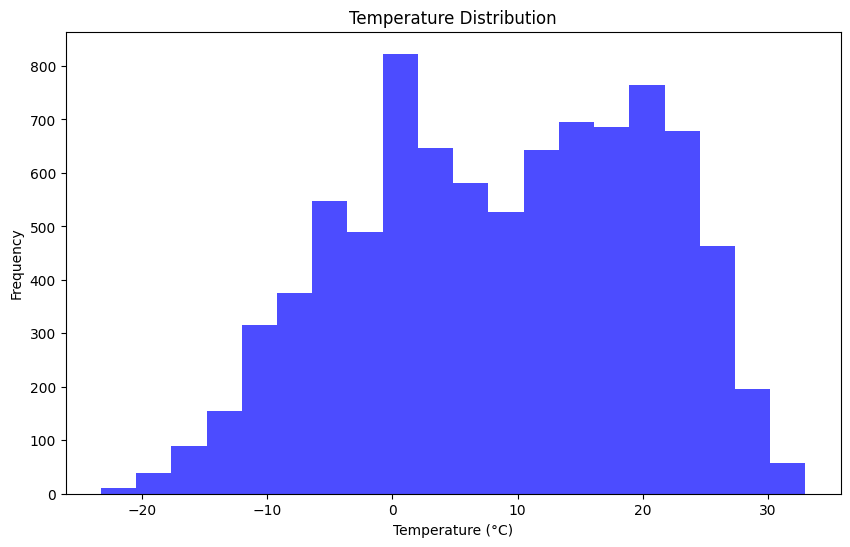

In [9]:
# EDA: Visualizing Temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis: Temperature over time

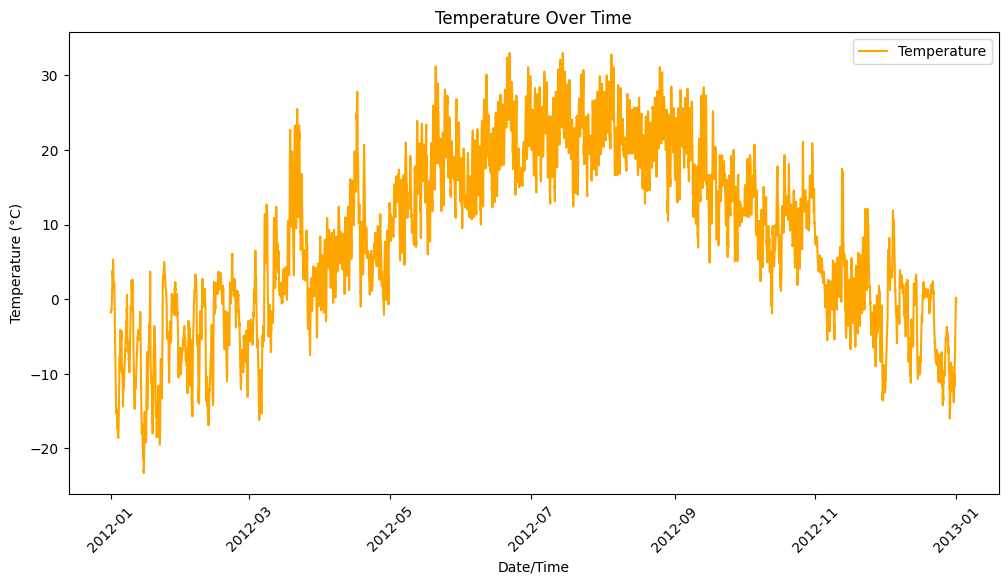

In [10]:
# Time Series Analysis: Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Temperature'], color='orange', label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# EDA: Correlation between Temperature and Relative Humidity

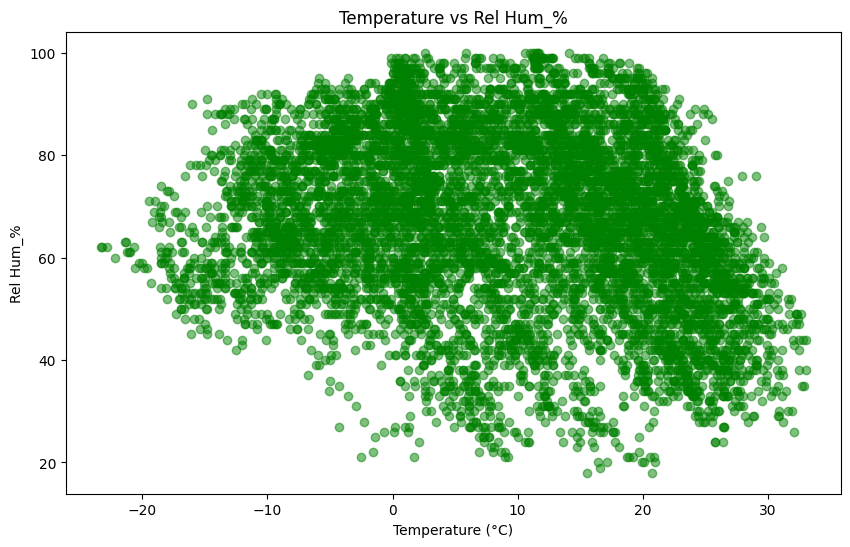

In [11]:

# EDA: Correlation between Temperature and Relative Humidity
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Rel Hum_%'], color='green', alpha=0.5)
plt.title('Temperature vs Rel Hum_%')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rel Hum_%')
plt.show()

# Weather patterns over the months (Seasonal Analysis)

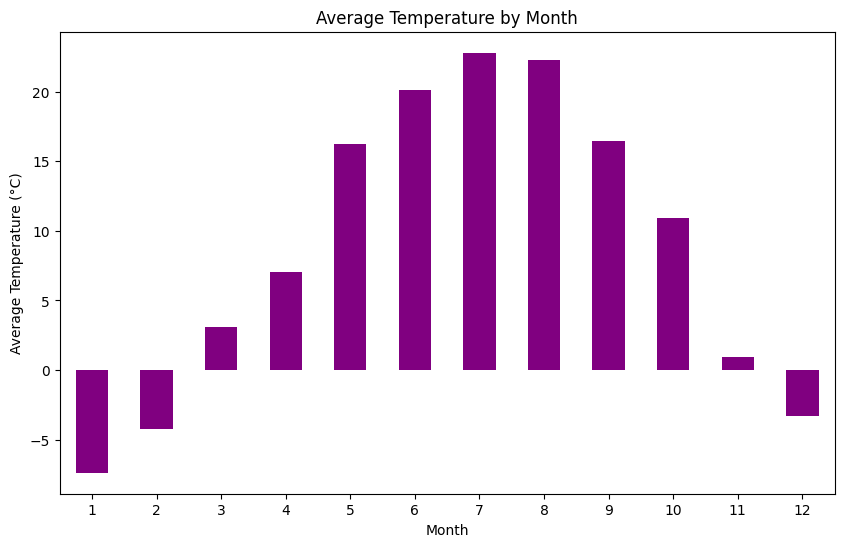

In [12]:

# Weather patterns over the months (Seasonal Analysis)
data['Month'] = data['Date/Time'].dt.month
monthly_avg_temp = data.groupby('Month')['Temperature'].mean()
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='purple')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


# Final Insights

In [13]:

# Final Insights
print("\nSeasonal Insights:")
print("1. Hottest month(s):", monthly_avg_temp.idxmax())
print("2. Coldest month(s):", monthly_avg_temp.idxmin())



Seasonal Insights:
1. Hottest month(s): 7
2. Coldest month(s): 1


# EDA: Wind Speed and Pressure correlation

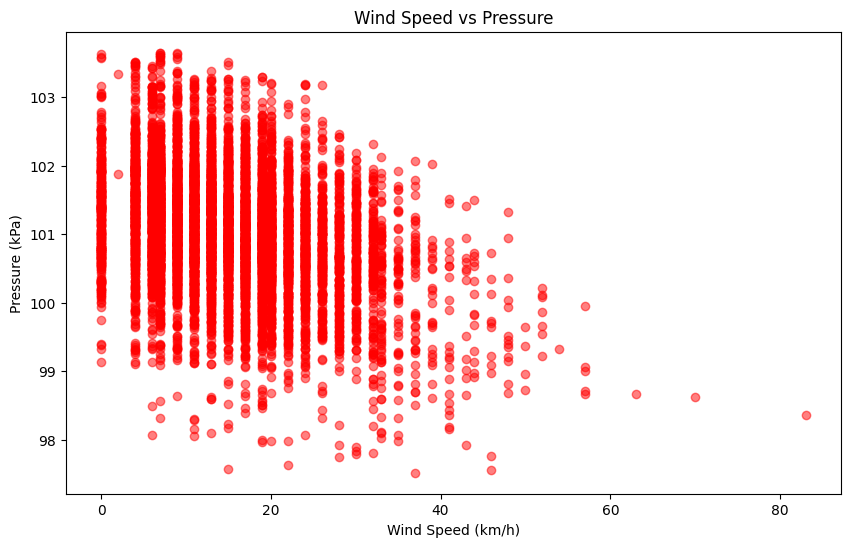

In [14]:

# EDA: Wind Speed and Pressure correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['Wind Speed_km/h'], data['Press_kPa'], color='red', alpha=0.5)
plt.title('Wind Speed vs Pressure')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Pressure (kPa)')
plt.show()

 # Weather Data Analysis

First few rows of the dataset:
       Date/Time  Temperature  Dew Point Temperature  Rel Hum_%  \
0  1/1/2012 0:00         -1.8                   -3.9         86   
1  1/1/2012 1:00         -1.8                   -3.7         87   
2  1/1/2012 2:00         -1.8                   -3.4         89   
3  1/1/2012 3:00         -1.5                   -3.2         88   
4  1/1/2012 4:00         -1.5                   -3.3         88   

   Wind Speed_km/h  Visibility_km  Press_kPa               Weather  
0                4            8.0     101.24                   Fog  
1                4            8.0     101.24                   Fog  
2                7            4.0     101.26  Freezing Drizzle,Fog  
3                6            4.0     101.27  Freezing Drizzle,Fog  
4                7            4.8     101.23                   Fog  

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column               

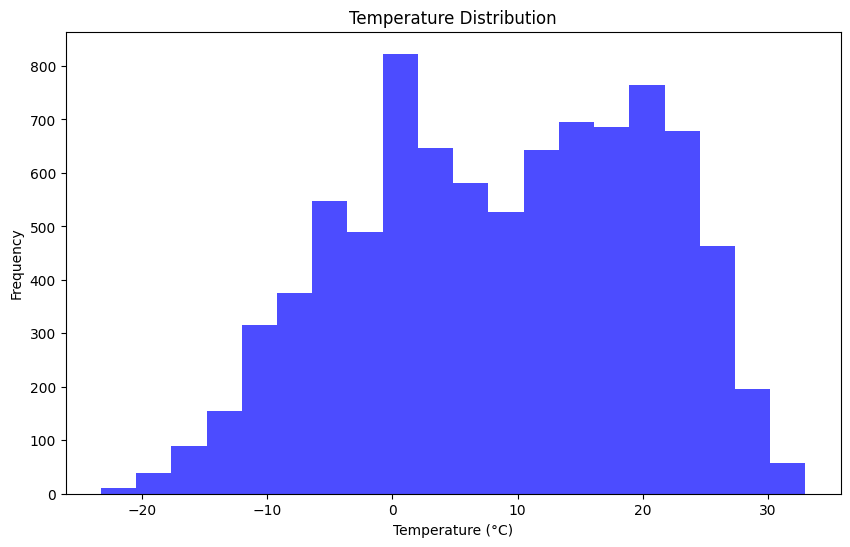

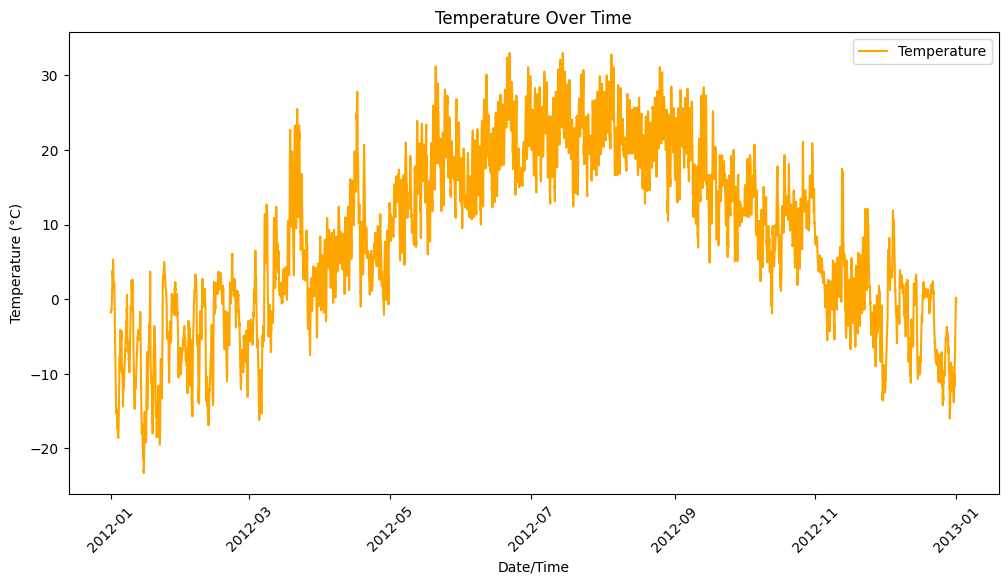

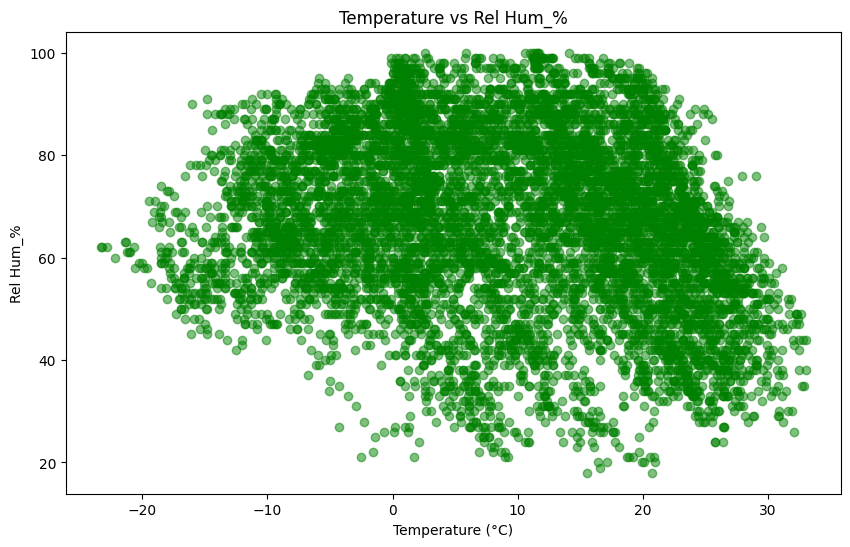

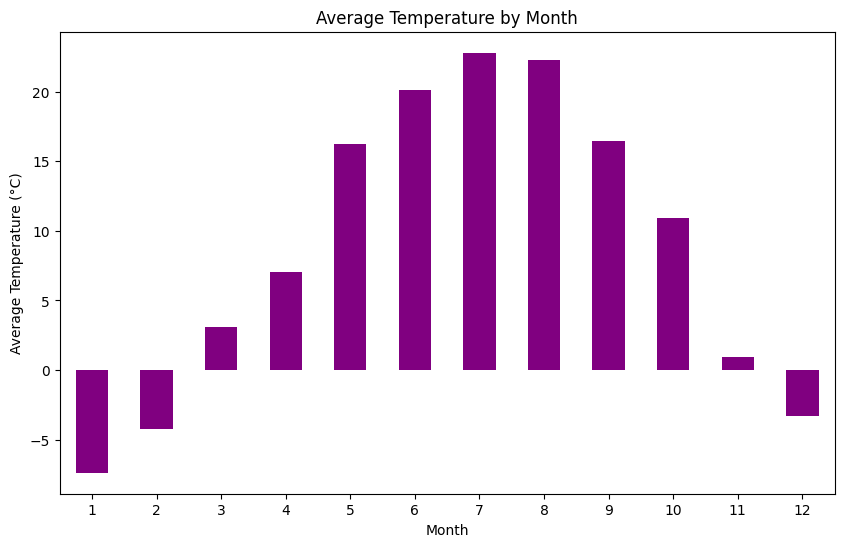


Seasonal Insights:
1. Hottest month(s): 7
2. Coldest month(s): 1


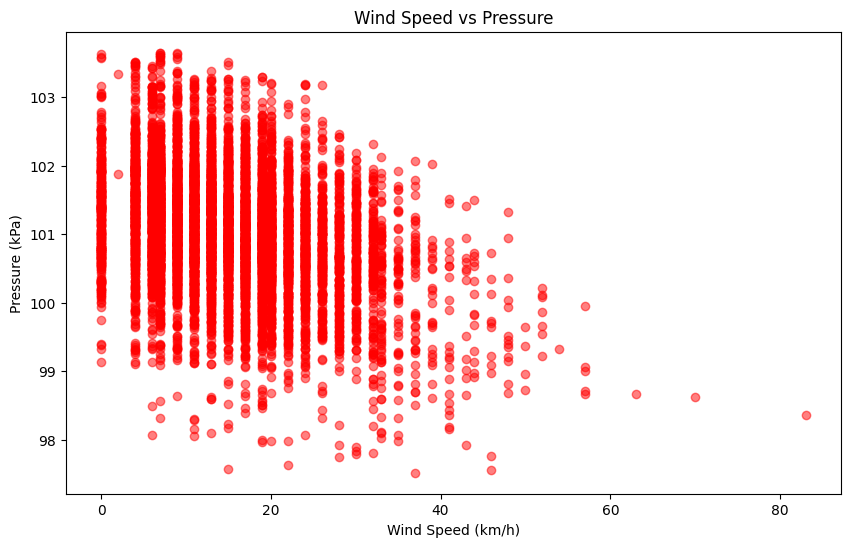

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (make sure to use the correct file path)
data = pd.read_csv('C:\\Users\\Administrator\\Documents\\Weather Dataa.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Data Cleaning: Handle missing values
data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())  # Fill missing temperature with mean
data['Dew Point Temperature'] = data['Dew Point Temperature'].fillna(data['Dew Point Temperature'].mean())  # Fill missing dew point temperature with mean
data['Rel Hum_%'] = data['Rel Hum_%'].fillna(data['Rel Hum_%'].mean())  # Fill missing humidity with mean
data['Wind Speed_km/h'] = data['Wind Speed_km/h'].fillna(data['Wind Speed_km/h'].mean())  # Fill missing wind speed with mean
data['Visibility_km'] = data['Visibility_km'].fillna(data['Visibility_km'].mean())  # Fill missing visibility with mean
data['Press_kPa'] = data['Press_kPa'].fillna(data['Press_kPa'].mean())  # Fill missing pressure with mean

# Convert 'Date/Time' to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Check cleaned data info
print("\nCleaned data info:")
print(data.info())

# EDA: Summary statistics
print("\nSummary statistics:")
print(data.describe())

# EDA: Visualizing Temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Temperature'], bins=20, color='blue', alpha=0.7)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis: Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Temperature'], color='orange', label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# EDA: Correlation between Temperature and Relative Humidity
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Rel Hum_%'], color='green', alpha=0.5)
plt.title('Temperature vs Rel Hum_%')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rel Hum_%')
plt.show()

# Weather patterns over the months (Seasonal Analysis)
data['Month'] = data['Date/Time'].dt.month
monthly_avg_temp = data.groupby('Month')['Temperature'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar', color='purple')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

# Final Insights
print("\nSeasonal Insights:")
print("1. Hottest month(s):", monthly_avg_temp.idxmax())
print("2. Coldest month(s):", monthly_avg_temp.idxmin())

# EDA: Wind Speed and Pressure correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['Wind Speed_km/h'], data['Press_kPa'], color='red', alpha=0.5)
plt.title('Wind Speed vs Pressure')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Pressure (kPa)')
plt.show()